In [ ]:
!git clone https://github.com/danushkhanna/iNeuron.ai-Phishing-Domain-Detection.git


fatal: destination path 'iNeuron.ai-Phishing-Domain-Detection' already exists and is not an empty directory.


In [ ]:
! pip install pandas numpy seaborn matplotlib pycaret


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from pycaret.classification import *

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/iNeuron.ai-Phishing-Domain-Detection/dataset_full.csv')
df

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
0,3,0,0,1,0,0,0,0,0,0,...,1,2,0,892,0,0,0,0,0,1
1,5,0,1,3,0,3,0,2,0,0,...,1,2,1,9540,1,0,0,0,0,1
2,2,0,0,1,0,0,0,0,0,0,...,1,2,3,589,1,0,0,0,0,0
3,4,0,2,5,0,0,0,0,0,0,...,1,2,0,292,1,0,0,0,0,1
4,2,0,0,0,0,0,0,0,0,0,...,1,2,1,3597,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88642,3,1,0,0,0,0,0,0,0,0,...,1,3,1,3597,0,0,0,0,0,0
88643,2,0,0,0,0,0,0,0,0,0,...,1,2,2,591,0,2,0,0,0,0
88644,2,1,0,5,0,0,0,0,0,0,...,1,2,5,14391,1,0,0,0,0,1
88645,2,0,0,1,0,0,0,0,0,0,...,1,1,1,52,1,0,0,0,0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88647 entries, 0 to 88646
Columns: 112 entries, qty_dot_url to phishing
dtypes: float64(1), int64(111)
memory usage: 75.7 MB


In [ ]:
df['phishing'].value_counts()

0    58000
1    30647
Name: phishing, dtype: int64

In [ ]:
df.isna().sum()

qty_dot_url             0
qty_hyphen_url          0
qty_underline_url       0
qty_slash_url           0
qty_questionmark_url    0
                       ..
qty_redirects           0
url_google_index        0
domain_google_index     0
url_shortened           0
phishing                0
Length: 112, dtype: int64

In [ ]:
df.dtypes

qty_dot_url             int64
qty_hyphen_url          int64
qty_underline_url       int64
qty_slash_url           int64
qty_questionmark_url    int64
                        ...  
qty_redirects           int64
url_google_index        int64
domain_google_index     int64
url_shortened           int64
phishing                int64
Length: 112, dtype: object

In [ ]:

#SUMMARY STATISTICS OF THE DATASET

print(df.describe())

        qty_dot_url  qty_hyphen_url  qty_underline_url  qty_slash_url  \
count  88647.000000    88647.000000       88647.000000   88647.000000   
mean       2.191343        0.328810           0.113879       1.281781   
std        1.235636        1.119286           0.657767       1.893929   
min        1.000000        0.000000           0.000000       0.000000   
25%        2.000000        0.000000           0.000000       0.000000   
50%        2.000000        0.000000           0.000000       0.000000   
75%        2.000000        0.000000           0.000000       2.000000   
max       24.000000       35.000000          21.000000      44.000000   

       qty_questionmark_url  qty_equal_url    qty_at_url   qty_and_url  \
count          88647.000000   88647.000000  88647.000000  88647.000000   
mean               0.009329       0.205861      0.022133      0.140885   
std                0.112568       0.954272      0.279652      0.924864   
min                0.000000       0.000000    

In [ ]:
import seaborn as sns
corr_matrix = df.corr()
corr_matrix

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
qty_dot_url,1.000000,0.109737,0.127851,0.246201,0.409549,0.498531,0.169224,0.550918,0.004187,-0.000405,...,-0.054120,-0.014089,-0.049845,0.012300,-0.065105,-0.051842,-0.004035,-0.002490,-0.059222,0.171128
qty_hyphen_url,0.109737,1.000000,0.213589,0.304762,0.061247,0.175158,0.041982,0.127984,0.018253,0.018090,...,0.029222,0.032991,-0.027048,-0.031027,0.009113,-0.001930,-0.002939,0.006875,-0.010346,0.200382
qty_underline_url,0.127851,0.213589,1.000000,0.246653,0.067009,0.334635,0.056885,0.256192,0.062300,-0.000767,...,0.004625,0.023962,-0.007595,-0.027089,0.012809,-0.013864,-0.001823,0.003421,-0.012158,0.191151
qty_slash_url,0.246201,0.304762,0.246653,1.000000,0.182759,0.287043,0.102281,0.202511,0.025946,0.015055,...,-0.046034,-0.032416,-0.045904,-0.021936,-0.018282,-0.047873,-0.005406,0.009470,-0.001125,0.699061
qty_questionmark_url,0.409549,0.061247,0.067009,0.182759,1.000000,0.461202,0.126747,0.467278,0.017859,0.004359,...,-0.025966,-0.003923,-0.032176,-0.006653,-0.040856,-0.024214,0.011679,0.010029,0.012847,0.111694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
qty_redirects,-0.051842,-0.001930,-0.013864,-0.047873,-0.024214,-0.043475,-0.017895,-0.030949,0.004488,-0.006923,...,0.274887,0.051420,0.133489,0.007329,0.306561,1.000000,0.038041,0.033091,0.049475,-0.061775
url_google_index,-0.004035,-0.002939,-0.001823,-0.005406,0.011679,-0.000349,-0.001903,-0.000335,-0.000811,-0.000336,...,0.043826,0.042233,0.022227,0.007591,0.026047,0.038041,1.000000,0.628815,-0.001785,-0.008986
domain_google_index,-0.002490,0.006875,0.003421,0.009470,0.010029,0.004701,-0.001889,0.001886,-0.001076,-0.000446,...,0.039959,0.040542,0.023628,0.008920,0.027592,0.033091,0.628815,1.000000,0.000045,0.000794
url_shortened,-0.059222,-0.010346,-0.012158,-0.001125,0.012847,-0.011855,-0.005330,-0.009989,-0.002503,-0.001038,...,0.059500,0.084482,0.013533,-0.031268,0.037850,0.049475,-0.001785,0.000045,1.000000,0.099250


In [ ]:
cols_to_drop = ['url_google_index',
                  'domain_google_index',
                  'qty_vowels_domain',
                  'server_client_domain',
                  'tld_present_params',
                  'time_response',
                  'domain_spf',
                  'qty_ip_resolved',
                  'qty_nameservers',
                  'qty_mx_servers',
                  'ttl_hostname',
                  'url_shortened']
df=df.drop(cols_to_drop, axis=1)

#PERFORMING FEATURE ENGINEERING ON DATA AND SHOWING IT
rows, columns = df.shape

original_features = list(df.columns)

dataset_array = np.array(df)

features_indices = []
attributes = ['url', 'domain', 'directory', 'file', 'params']

new_dataset = {}

for index, name in enumerate(original_features):
    if 'qty' in name and name.split('_')[-1] in attributes:
        features_indices.append([index, name.split('_')[-1]])
    else:
        new_dataset[name] = dataset_array[:, index]


for index, attribute in features_indices:
  if attribute == 'domain':
    if f"qty_char_{attribute}" not in new_dataset.keys():
        new_dataset[f"qty_char_{attribute}"] = np.zeros(rows)

    new_dataset[f"qty_char_{attribute}"] += dataset_array[:,index]

df1 = pd.DataFrame(new_dataset).astype(int)
df1[df1<-1] = -1
df1

,length_url,domain_length,domain_in_ip,directory_length,file_length,params_length,email_in_url,asn_ip,time_domain_activation,time_domain_expiration,tls_ssl_certificate,qty_redirects,phishing,qty_char_domain
0,25,17,0,8,7,-1,0,60781,-1,-1,0,0,1,2
1,223,16,0,42,9,165,0,36024,579,150,1,0,1,2
2,15,14,0,1,0,-1,0,4766,-1,-1,1,0,0,2
3,81,19,0,62,9,-1,0,20454,-1,-1,1,0,1,2
4,19,19,0,-1,-1,-1,0,53831,6998,306,0,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88642,23,23,0,-1,-1,-1,0,8560,5509,334,0,0,0,4
88643,34,34,0,-1,-1,-1,0,26496,5046,431,0,2,0,2
88644,70,22,0,48,11,-1,0,394695,1844,712,1,0,1,1
88645,28,27,0,1,0,-1,0,47583,-1,-1,1,0,1,2


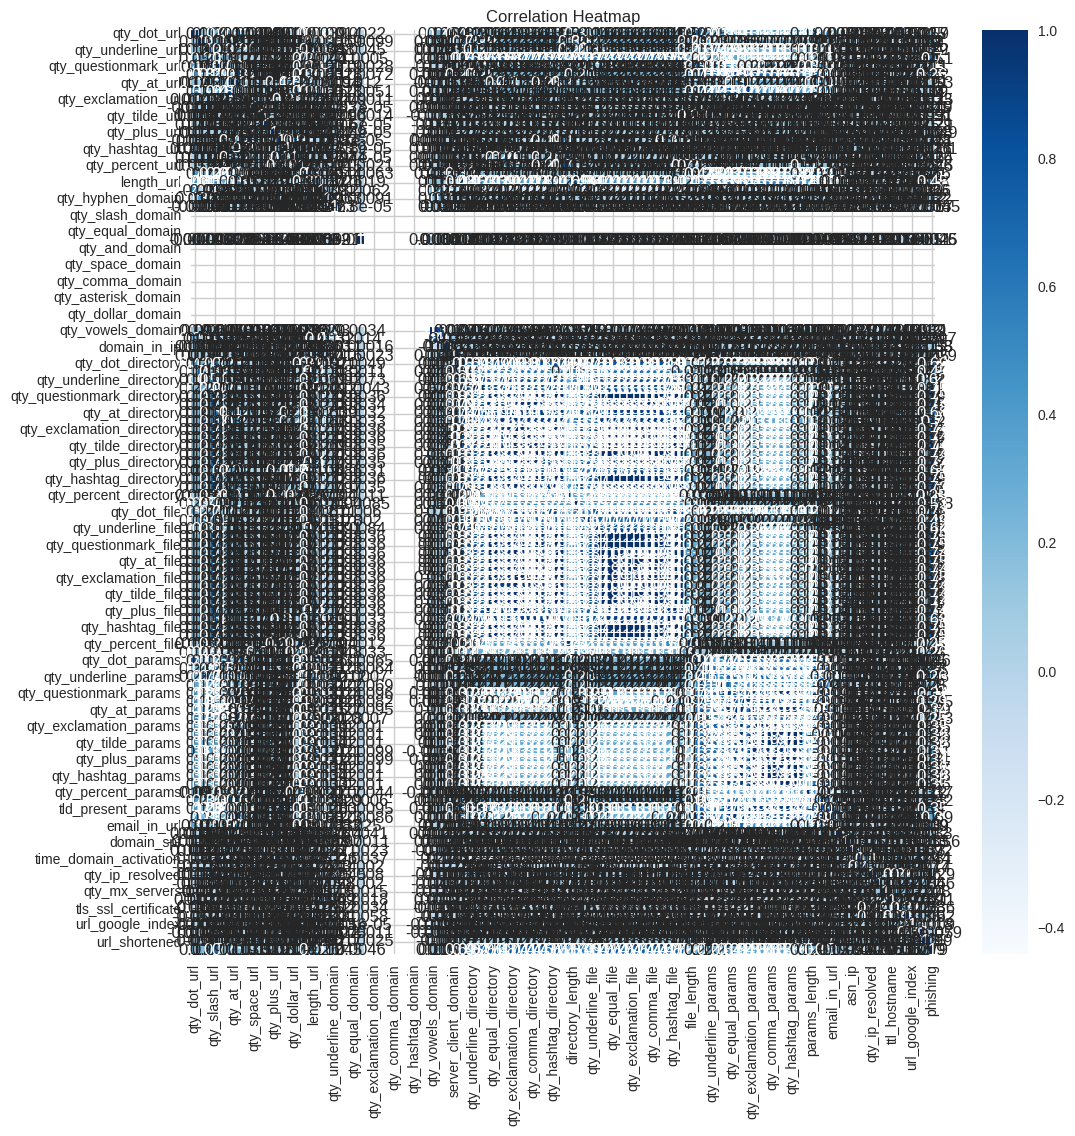

In [ ]:
# Plot the correlation heatmap
plt.figure(figsize=(12, 12))
sns.heatmap(corr_matrix, annot=True, cmap='Blues')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
df1.to_csv('/content/iNeuron.ai-Phishing-Domain-Detection/features_new.csv')

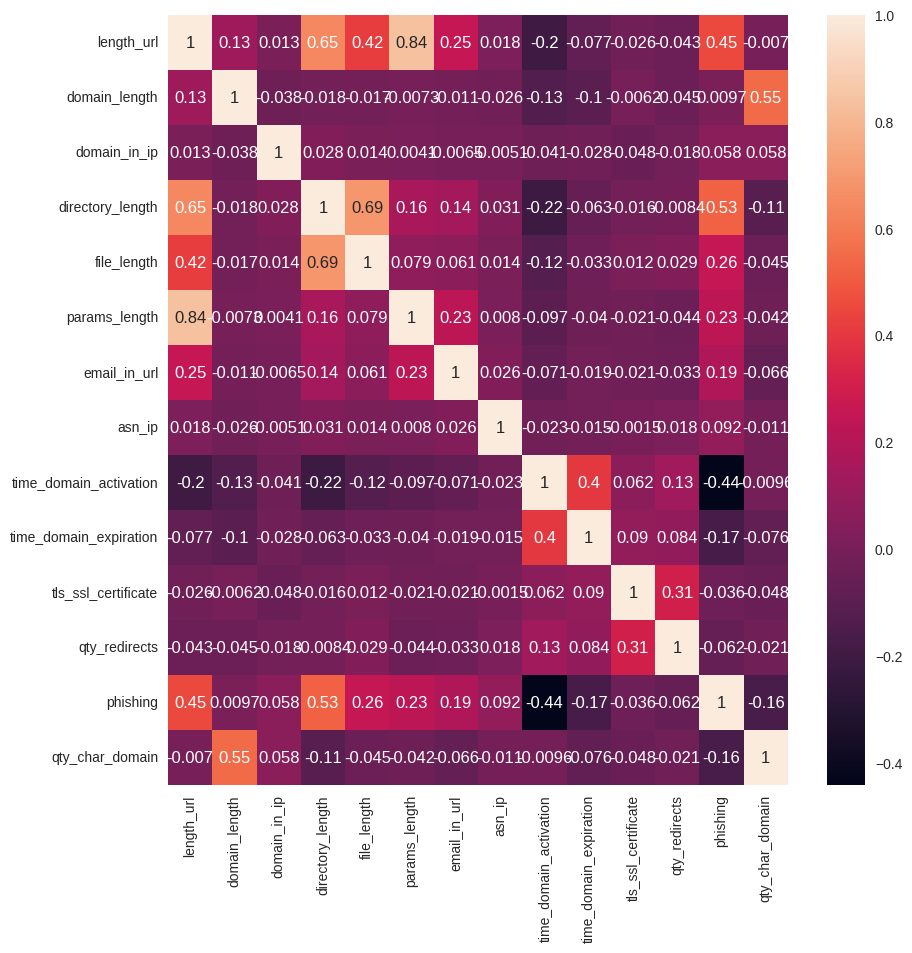

In [ ]:
corr = df1.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True)
plt.show()

In [ ]:
print(df1.describe())

         length_url  domain_length  domain_in_ip  directory_length  \
count  88647.000000   88647.000000  88647.000000      88647.000000   
mean      36.347615      18.560820      0.002267         10.857694   
std       46.191590       6.598694      0.047564         24.352634   
min        4.000000       4.000000      0.000000         -1.000000   
25%       17.000000      14.000000      0.000000         -1.000000   
50%       22.000000      18.000000      0.000000         -1.000000   
75%       38.000000      22.000000      0.000000         16.000000   
max     4165.000000     231.000000      1.000000       1286.000000   

        file_length  params_length  email_in_url         asn_ip  \
count  88647.000000   88647.000000  88647.000000   88647.000000   
mean       2.743793       5.273185      0.018331   31131.152763   
std       13.572252      34.937007      0.134147   45261.502645   
min       -1.000000      -1.000000      0.000000      -1.000000   
25%       -1.000000      -1.000000

In [ ]:
X = df1.iloc[:, 0:].values
y = df1.iloc[:, 12]
print("X:")
print(X)
print("\nY:")
print(y)

X:
[[ 25  17   0 ...   0   1   2]
 [223  16   0 ...   0   1   2]
 [ 15  14   0 ...   0   0   2]
 ...
 [ 70  22   0 ...   0   1   1]
 [ 28  27   0 ...   0   1   2]
 [ 16  16   0 ...   0   0   2]]

Y:
0        1
1        1
2        0
3        1
4        0
        ..
88642    0
88643    0
88644    1
88645    1
88646    0
Name: phishing, Length: 88647, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 110)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(70917, 14)
(70917,)
(17730, 14)
(17730,)


In [ ]:
import time
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

results = {}

start_time = time.time()
logistic = LogisticRegression()
logistic.fit(X_train, y_train)
y_pred = logistic.predict(X_test)

end_time = time.time()
training_time = end_time - start_time

results['Logistic Regression'] = [accuracy_score(y_test, y_pred),
                                  precision_score(y_test, y_pred, average='weighted'),
                                  recall_score(y_test, y_pred, average='weighted'),
                                  f1_score(y_test, y_pred, average='weighted'),
                                  training_time]

df_results = pd.DataFrame.from_dict(results, orient='index', columns=['Accuracy', 'Precision', 'Recall', 'F1-Score', 'Training Time'])
df_results


,Accuracy,Precision,Recall,F1-Score,Training Time
Logistic Regression,0.886464,0.887282,0.886464,0.884106,1.21067


In [ ]:
import time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

start_time = time.time()

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

end_time = time.time()
training_time = end_time - start_time

results['K-Nearest Neighbors (KNN)'] = [accuracy_score(y_test, y_pred),
                                  precision_score(y_test, y_pred, average='weighted'),
                                  recall_score(y_test, y_pred, average='weighted'),
                                  f1_score(y_test, y_pred, average='weighted'),
                                  training_time]

df_results = pd.DataFrame.from_dict(results, orient='index', columns=['Accuracy', 'Precision', 'Recall', 'F1-Score', 'Training Time'])
df_results



,Accuracy,Precision,Recall,F1-Score,Training Time
Logistic Regression,0.886464,0.887282,0.886464,0.884106,1.210670
K-Nearest Neighbors (KNN),0.898759,0.898212,0.898759,0.898347,2.539314


In [ ]:
from sklearn.naive_bayes import GaussianNB
import time

start_time = time.time()
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

end_time = time.time()
training_time = end_time - start_time

results['GaussianNB'] = [accuracy_score(y_test, y_pred),
                                  precision_score(y_test, y_pred, average='weighted'),
                                  recall_score(y_test, y_pred, average='weighted'),
                                  f1_score(y_test, y_pred, average='weighted'),
                                  training_time]

df_results = pd.DataFrame.from_dict(results, orient='index', columns=['Accuracy', 'Precision', 'Recall', 'F1-Score', 'Training Time'])
df_results

,Accuracy,Precision,Recall,F1-Score,Training Time
Logistic Regression,0.886464,0.887282,0.886464,0.884106,1.210670
K-Nearest Neighbors (KNN),0.898759,0.898212,0.898759,0.898347,2.539314
GaussianNB,0.814834,0.829996,0.814834,0.800378,0.083115


In [ ]:
import time
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

start_time = time.time()

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

end_time = time.time()
training_time = end_time - start_time

results['Decision Trees'] = [accuracy_score(y_test, y_pred),
                                  precision_score(y_test, y_pred, average='weighted'),
                                  recall_score(y_test, y_pred, average='weighted'),
                                  f1_score(y_test, y_pred, average='weighted'),
                                  training_time]
df_results = pd.DataFrame.from_dict(results, orient='index', columns=['Accuracy', 'Precision', 'Recall', 'F1-Score', 'Training Time'])
df_results

,Accuracy,Precision,Recall,F1-Score,Training Time
Logistic Regression,0.886464,0.887282,0.886464,0.884106,1.210670
K-Nearest Neighbors (KNN),0.898759,0.898212,0.898759,0.898347,2.539314
GaussianNB,0.814834,0.829996,0.814834,0.800378,0.083115
Decision Trees,1.000000,1.000000,1.000000,1.000000,0.062323


In [ ]:
import time
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

start_time = time.time()

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

end_time = time.time()
training_time = end_time - start_time

results['Random Forest'] = [accuracy_score(y_test, y_pred),
                                  precision_score(y_test, y_pred, average='weighted'),
                                  recall_score(y_test, y_pred, average='weighted'),
                                  f1_score(y_test, y_pred, average='weighted'),
                                  training_time]
df_results = pd.DataFrame.from_dict(results, orient='index', columns=['Accuracy', 'Precision', 'Recall', 'F1-Score', 'Training Time'])
df_results

,Accuracy,Precision,Recall,F1-Score,Training Time
Logistic Regression,0.886464,0.887282,0.886464,0.884106,1.210670
K-Nearest Neighbors (KNN),0.898759,0.898212,0.898759,0.898347,2.539314
GaussianNB,0.814834,0.829996,0.814834,0.800378,0.083115
Decision Trees,1.000000,1.000000,1.000000,1.000000,0.062323
Random Forest,1.000000,1.000000,1.000000,1.000000,6.505712


In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
import time

start_time = time.time()
et = ExtraTreesClassifier()
et.fit(X_train, y_train)
y_pred = et.predict(X_test)

end_time = time.time()
training_time = end_time - start_time

results['Extra Trees'] = [accuracy_score(y_test, y_pred),
                                  precision_score(y_test, y_pred, average='weighted'),
                                  recall_score(y_test, y_pred, average='weighted'),
                                  f1_score(y_test, y_pred, average='weighted'),
                                  training_time]

df_results = pd.DataFrame.from_dict(results, orient='index', columns=['Accuracy', 'Precision', 'Recall', 'F1-Score', 'Training Time'])
df_results

,Accuracy,Precision,Recall,F1-Score,Training Time
Logistic Regression,0.886464,0.887282,0.886464,0.884106,1.210670
K-Nearest Neighbors (KNN),0.898759,0.898212,0.898759,0.898347,2.539314
GaussianNB,0.814834,0.829996,0.814834,0.800378,0.083115
Decision Trees,1.000000,1.000000,1.000000,1.000000,0.062323
Random Forest,1.000000,1.000000,1.000000,1.000000,6.505712
Extra Trees,1.000000,1.000000,1.000000,1.000000,2.625122


In [ ]:
from sklearn.svm import SVC
import time

start_time = time.time()
svm = SVC()
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

end_time = time.time()
training_time = end_time - start_time

results['Support Vector Machines'] = [accuracy_score(y_test, y_pred),
                                  precision_score(y_test, y_pred, average='weighted'),
                                  recall_score(y_test, y_pred, average='weighted'),
                                  f1_score(y_test, y_pred, average='weighted'),
                                  training_time]

df_results = pd.DataFrame.from_dict(results, orient='index', columns=['Accuracy', 'Precision', 'Recall', 'F1-Score', 'Training Time'])
df_results


,Accuracy,Precision,Recall,F1-Score,Training Time
Logistic Regression,0.886464,0.887282,0.886464,0.884106,1.210670
K-Nearest Neighbors (KNN),0.898759,0.898212,0.898759,0.898347,2.539314
GaussianNB,0.814834,0.829996,0.814834,0.800378,0.083115
Decision Trees,1.000000,1.000000,1.000000,1.000000,0.062323
Random Forest,1.000000,1.000000,1.000000,1.000000,6.505712
Extra Trees,1.000000,1.000000,1.000000,1.000000,2.625122
Support Vector Machines,0.742865,0.738841,0.742865,0.740243,313.149442


In [ ]:
import time
from sklearn.neural_network import MLPClassifier

start_time = time.time()
mlp = MLPClassifier()
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)

end_time = time.time()
training_time = end_time - start_time

results['Neural Networks (Multi-layer Perceptron)'] = [accuracy_score(y_test, y_pred),
                                  precision_score(y_test, y_pred, average='weighted'),
                                  recall_score(y_test, y_pred, average='weighted'),
                                  f1_score(y_test, y_pred, average='weighted'),
                                  training_time]

df_results = pd.DataFrame.from_dict(results, orient='index', columns=['Accuracy', 'Precision', 'Recall', 'F1-Score', 'Training Time'])
df_results


,Accuracy,Precision,Recall,F1-Score,Training Time
Logistic Regression,0.886464,0.887282,0.886464,0.884106,1.210670
K-Nearest Neighbors (KNN),0.898759,0.898212,0.898759,0.898347,2.539314
GaussianNB,0.814834,0.829996,0.814834,0.800378,0.083115
Decision Trees,1.000000,1.000000,1.000000,1.000000,0.062323
Random Forest,1.000000,1.000000,1.000000,1.000000,6.505712
Extra Trees,1.000000,1.000000,1.000000,1.000000,2.625122
Support Vector Machines,0.742865,0.738841,0.742865,0.740243,313.149442
Neural Networks (Multi-layer Perceptron),0.946926,0.953152,0.946926,0.947622,46.827727


In [ ]:
import time
from sklearn.ensemble import AdaBoostClassifier

start_time = time.time()
ada = AdaBoostClassifier()
ada.fit(X_train, y_train)
y_pred = ada.predict(X_test)

end_time = time.time()
training_time = end_time - start_time

results['AdaBoost'] = [accuracy_score(y_test, y_pred),
                                  precision_score(y_test, y_pred, average='weighted'),
                                  recall_score(y_test, y_pred, average='weighted'),
                                  f1_score(y_test, y_pred, average='weighted'),
                                  training_time]
df_results = pd.DataFrame.from_dict(results, orient='index', columns=['Accuracy', 'Precision', 'Recall', 'F1-Score', 'Training Time'])
df_results

,Accuracy,Precision,Recall,F1-Score,Training Time
Logistic Regression,0.886464,0.887282,0.886464,0.884106,1.210670
K-Nearest Neighbors (KNN),0.898759,0.898212,0.898759,0.898347,2.539314
GaussianNB,0.814834,0.829996,0.814834,0.800378,0.083115
Decision Trees,1.000000,1.000000,1.000000,1.000000,0.062323
Random Forest,1.000000,1.000000,1.000000,1.000000,6.505712
Extra Trees,1.000000,1.000000,1.000000,1.000000,2.625122
Support Vector Machines,0.742865,0.738841,0.742865,0.740243,313.149442
Neural Networks (Multi-layer Perceptron),0.946926,0.953152,0.946926,0.947622,46.827727
AdaBoost,1.000000,1.000000,1.000000,1.000000,0.085738


In [ ]:
import time
import xgboost as xgb
from xgboost import XGBClassifier

start_time = time.time()
xgboost = xgb.XGBClassifier()
xgboost.fit(X_train, y_train)
y_pred = xgboost.predict(X_test)

end_time = time.time()
training_time = end_time - start_time

results['XGBoost'] = [accuracy_score(y_test, y_pred),
                                  precision_score(y_test, y_pred, average='weighted'),
                                  recall_score(y_test, y_pred, average='weighted'),
                                  f1_score(y_test, y_pred, average='weighted'),
                                  training_time]
df_results = pd.DataFrame.from_dict(results, orient='index', columns=['Accuracy', 'Precision', 'Recall', 'F1-Score', 'Training Time'])
df_results

,Accuracy,Precision,Recall,F1-Score,Training Time
Logistic Regression,0.886464,0.887282,0.886464,0.884106,1.210670
K-Nearest Neighbors (KNN),0.898759,0.898212,0.898759,0.898347,2.539314
GaussianNB,0.814834,0.829996,0.814834,0.800378,0.083115
Decision Trees,1.000000,1.000000,1.000000,1.000000,0.062323
Random Forest,1.000000,1.000000,1.000000,1.000000,6.505712
Extra Trees,1.000000,1.000000,1.000000,1.000000,2.625122
Support Vector Machines,0.742865,0.738841,0.742865,0.740243,313.149442
Neural Networks (Multi-layer Perceptron),0.946926,0.953152,0.946926,0.947622,46.827727
AdaBoost,1.000000,1.000000,1.000000,1.000000,0.085738
XGBoost,1.000000,1.000000,1.000000,1.000000,0.750717


In [ ]:
import time
!pip install catboost
from catboost import CatBoostClassifier

start_time = time.time()
cat = CatBoostClassifier()
cat.fit(X_train, y_train)
y_pred = cat.predict(X_test)

end_time = time.time()
training_time = end_time - start_time

results['CatBoost'] = [accuracy_score(y_test, y_pred),
                                  precision_score(y_test, y_pred, average='weighted'),
                                  recall_score(y_test, y_pred, average='weighted'),
                                  f1_score(y_test, y_pred, average='weighted'),
                                  training_time]
df_results = pd.DataFrame.from_dict(results, orient='index', columns=['Accuracy', 'Precision', 'Recall', 'F1-Score', 'Training Time'])
df_results

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 4.2 MB/s eta 0:00:00
Learning rate set to 0.063563
0:	learn: 0.4408203	total: 67.3ms	remaining: 1m 7s
1:	learn: 0.2706432	total: 86ms	remaining: 42.9s
2:	learn: 0.1692338	total: 107ms	remaining: 35.5s
3:	learn: 0.1061416	total: 133ms	remaining: 33.2s
4:	learn: 0.0673814	total: 150ms	remaining: 29.8s
5:	learn: 0.0443492	total: 167ms	remaining: 27.6s
6:	learn: 0.0300799	total: 185ms	remaining: 26.2s
7:	learn: 0.0205167	total: 211ms	remaining: 26.1s
8:	learn: 0.0141606	total: 228ms	remaining: 25.1s
9:	learn: 0.0099748	total: 244ms	remaining: 24.1s
10:	learn: 0.0070856	total: 261ms	remaining: 23.4s
11:	learn: 0.0049635	total: 277ms	remaining: 22.8s
12:	learn: 0.0037288	total: 291ms	remaining: 22.1s
13:	learn: 0.0027178	total: 305ms	remaining: 21.5s
14:	learn: 0.0021126	total: 321ms	remaining: 21.1s
15:	learn: 0.0016223	total: 338ms	remaining: 20.8s
16:	learn: 0.0012577	total: 353ms	remaining: 20.4s
17:	learn: 0.0010031	total: 368ms

,Accuracy,Precision,Recall,F1-Score,Training Time
Logistic Regression,0.886464,0.887282,0.886464,0.884106,1.210670
K-Nearest Neighbors (KNN),0.898759,0.898212,0.898759,0.898347,2.539314
GaussianNB,0.814834,0.829996,0.814834,0.800378,0.083115
Decision Trees,1.000000,1.000000,1.000000,1.000000,0.062323
Random Forest,1.000000,1.000000,1.000000,1.000000,6.505712
Extra Trees,1.000000,1.000000,1.000000,1.000000,2.625122
Support Vector Machines,0.742865,0.738841,0.742865,0.740243,313.149442
Neural Networks (Multi-layer Perceptron),0.946926,0.953152,0.946926,0.947622,46.827727
AdaBoost,1.000000,1.000000,1.000000,1.000000,0.085738
XGBoost,1.000000,1.000000,1.000000,1.000000,0.750717


In [ ]:
import time
from sklearn.linear_model import SGDClassifier

start_time = time.time()
sgd = SGDClassifier(loss='hinge', random_state=42)
sgd.fit(X_train, y_train)
y_pred = sgd.predict(X_test)

end_time = time.time()
training_time = end_time - start_time

results['Stochastic Gradient Descent (SGD)'] = [accuracy_score(y_test, y_pred),
                                  precision_score(y_test, y_pred, average='weighted'),
                                  recall_score(y_test, y_pred, average='weighted'),
                                  f1_score(y_test, y_pred, average='weighted'),
                                  training_time]
df_results = pd.DataFrame.from_dict(results, orient='index', columns=['Accuracy', 'Precision', 'Recall', 'F1-Score', 'Training Time'])
df_results

,Accuracy,Precision,Recall,F1-Score,Training Time
Logistic Regression,0.886464,0.887282,0.886464,0.884106,1.210670
K-Nearest Neighbors (KNN),0.898759,0.898212,0.898759,0.898347,2.539314
GaussianNB,0.814834,0.829996,0.814834,0.800378,0.083115
Decision Trees,1.000000,1.000000,1.000000,1.000000,0.062323
Random Forest,1.000000,1.000000,1.000000,1.000000,6.505712
Extra Trees,1.000000,1.000000,1.000000,1.000000,2.625122
Support Vector Machines,0.742865,0.738841,0.742865,0.740243,313.149442
Neural Networks (Multi-layer Perceptron),0.946926,0.953152,0.946926,0.947622,46.827727
AdaBoost,1.000000,1.000000,1.000000,1.000000,0.085738
XGBoost,1.000000,1.000000,1.000000,1.000000,0.750717


In [ ]:
import time
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

start_time = time.time()
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
y_pred = lda.predict(X_test)

end_time = time.time()
training_time = end_time - start_time

results['Linear Discriminant Analysis (LDA)'] = [accuracy_score(y_test, y_pred),
                                  precision_score(y_test, y_pred, average='weighted'),
                                  recall_score(y_test, y_pred, average='weighted'),
                                  f1_score(y_test, y_pred, average='weighted'),
                                  training_time]
df_results = pd.DataFrame.from_dict(results, orient='index', columns=['Accuracy', 'Precision', 'Recall', 'F1-Score', 'Training Time'])
df_results

,Accuracy,Precision,Recall,F1-Score,Training Time
Logistic Regression,0.886464,0.887282,0.886464,0.884106,1.210670
K-Nearest Neighbors (KNN),0.898759,0.898212,0.898759,0.898347,2.539314
GaussianNB,0.814834,0.829996,0.814834,0.800378,0.083115
Decision Trees,1.000000,1.000000,1.000000,1.000000,0.062323
Random Forest,1.000000,1.000000,1.000000,1.000000,6.505712
Extra Trees,1.000000,1.000000,1.000000,1.000000,2.625122
Support Vector Machines,0.742865,0.738841,0.742865,0.740243,313.149442
Neural Networks (Multi-layer Perceptron),0.946926,0.953152,0.946926,0.947622,46.827727
AdaBoost,1.000000,1.000000,1.000000,1.000000,0.085738
XGBoost,1.000000,1.000000,1.000000,1.000000,0.750717


In [ ]:
import time
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis


start_time = time.time()
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)
y_pred = qda.predict(X_test)

end_time = time.time()
training_time = end_time - start_time

results['Quadratic Discriminant Analysis (QDA)'] = [accuracy_score(y_test, y_pred),
                                  precision_score(y_test, y_pred, average='weighted'),
                                  recall_score(y_test, y_pred, average='weighted'),
                                  f1_score(y_test, y_pred, average='weighted'),
                                  training_time]
df_results = pd.DataFrame.from_dict(results, orient='index', columns=['Accuracy', 'Precision', 'Recall', 'F1-Score', 'Training Time'])
df_results

,Accuracy,Precision,Recall,F1-Score,Training Time
Logistic Regression,0.886464,0.887282,0.886464,0.884106,1.210670
K-Nearest Neighbors (KNN),0.898759,0.898212,0.898759,0.898347,2.539314
GaussianNB,0.814834,0.829996,0.814834,0.800378,0.083115
Decision Trees,1.000000,1.000000,1.000000,1.000000,0.062323
Random Forest,1.000000,1.000000,1.000000,1.000000,6.505712
Extra Trees,1.000000,1.000000,1.000000,1.000000,2.625122
Support Vector Machines,0.742865,0.738841,0.742865,0.740243,313.149442
Neural Networks (Multi-layer Perceptron),0.946926,0.953152,0.946926,0.947622,46.827727
AdaBoost,1.000000,1.000000,1.000000,1.000000,0.085738
XGBoost,1.000000,1.000000,1.000000,1.000000,0.750717


In [ ]:
import time
import tensorflow as tf

model = tf.keras.Sequential([
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

model.compile(loss='binary_crossentropy', metrics=['binary_accuracy'], optimizer='adam')

start_time = time.time()

history = model.fit(X_train,
                         y_train,
                         epochs=500,
                         verbose=1, batch_size=32, validation_data=(X_test, y_test))
end_time = time.time()
training_time = end_time - start_time

Epoch 1/500
2217/2217 [==============================] - 8s 3ms/step - loss: 65.5515 - binary_accuracy: 0.7156 - val_loss: 73.7195 - val_binary_accuracy: 0.5554
Epoch 2/500
2217/2217 [==============================] - 7s 3ms/step - loss: 24.9845 - binary_accuracy: 0.7844 - val_loss: 8.7531 - val_binary_accuracy: 0.8086
Epoch 3/500
2217/2217 [==============================] - 5s 2ms/step - loss: 14.3522 - binary_accuracy: 0.8144 - val_loss: 6.3070 - val_binary_accuracy: 0.8155
Epoch 4/500
2217/2217 [==============================] - 6s 3ms/step - loss: 7.1459 - binary_accuracy: 0.8361 - val_loss: 1.5509 - val_binary_accuracy: 0.8885
Epoch 5/500
2217/2217 [==============================] - 6s 3ms/step - loss: 3.6702 - binary_accuracy: 0.8504 - val_loss: 1.3716 - val_binary_accuracy: 0.8625
Epoch 6/500
2217/2217 [==============================] - 6s 3ms/step - loss: 2.1320 - binary_accuracy: 0.8588 - val_loss: 3.7831 - val_binary_accuracy: 0.6387
Epoch 7/500
2217/2217 [===================

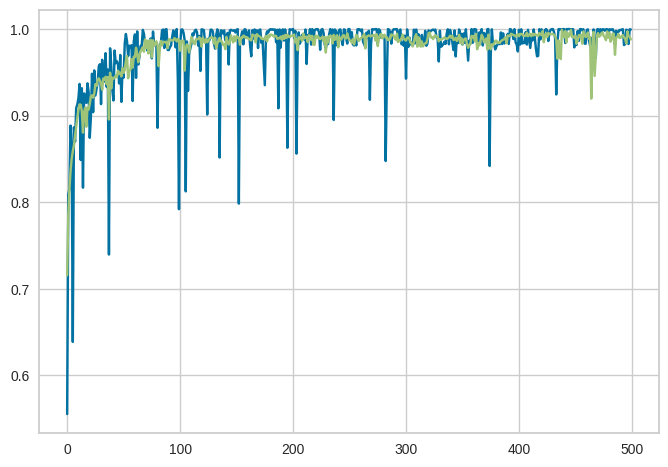

In [ ]:
plt.plot(history.history['val_binary_accuracy'])
plt.plot(history.history['binary_accuracy'])

In [ ]:
y_pred = np.round(model.predict(X_test)).flatten()

results['Neural Network'] = [accuracy_score(y_test, y_pred),
                             precision_score(y_test, y_pred, average='weighted'),
                             recall_score(y_test, y_pred, average='weighted'),
                             f1_score(y_test, y_pred, average='weighted'),
                             training_time]
df_results = pd.DataFrame.from_dict(results, orient='index', columns=['Accuracy', 'Precision', 'Recall', 'F1-Score', 'Training Time'])

df_results

555/555 [==============================] - 1s 2ms/step


,Accuracy,Precision,Recall,F1-Score,Training Time
Logistic Regression,0.886464,0.887282,0.886464,0.884106,1.210670
K-Nearest Neighbors (KNN),0.898759,0.898212,0.898759,0.898347,2.539314
GaussianNB,0.814834,0.829996,0.814834,0.800378,0.083115
Decision Trees,1.000000,1.000000,1.000000,1.000000,0.062323
Random Forest,1.000000,1.000000,1.000000,1.000000,6.505712
Extra Trees,1.000000,1.000000,1.000000,1.000000,2.625122
Support Vector Machines,0.742865,0.738841,0.742865,0.740243,313.149442
Neural Networks (Multi-layer Perceptron),0.946926,0.953152,0.946926,0.947622,46.827727
AdaBoost,1.000000,1.000000,1.000000,1.000000,0.085738
XGBoost,1.000000,1.000000,1.000000,1.000000,0.750717


In [ ]:
import time

start_time = time.time()
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
y_pred = lda.predict(X_test)

end_time = time.time()
training_time = end_time - start_time
from sklearn.metrics import classification_report

# Generate classification report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.84      0.97      0.90     11500
           1       0.91      0.65      0.76      6230

    accuracy                           0.85     17730
   macro avg       0.87      0.81      0.83     17730
weighted avg       0.86      0.85      0.85     17730



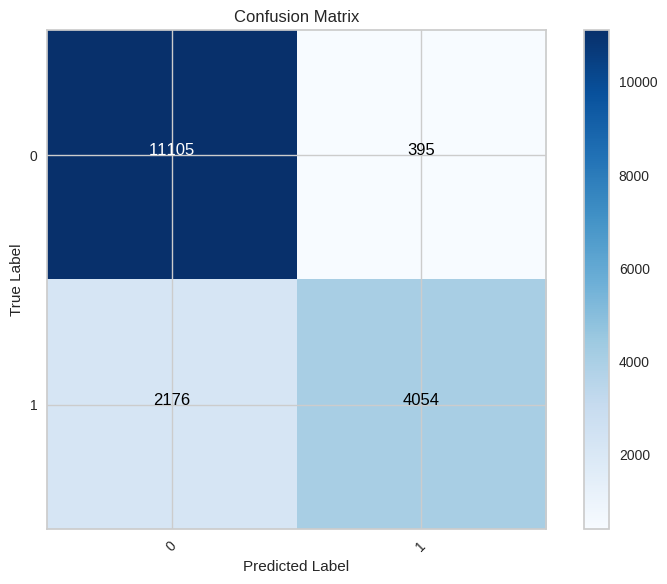

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Define class labels
classes = ['0', '1']

# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Fill the cells of the confusion matrix with values
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.show()